In [1]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

mushroom_data = pd.read_csv("mushrooms.csv")
mushroom_data

,Edible,CapShape,CapSurface,CapColor,Odor,Height
0,Poisonous,Convex,Smooth,Brown,Pungent,Tall
1,Edible,Convex,Smooth,Yellow,Almond,Short
2,Edible,Bell,Smooth,White,Anise,Tall
3,Poisonous,Convex,Scaly,White,Pungent,Short
4,Edible,Convex,Smooth,Gray,None,Short
...,...,...,...,...,...,...
8119,Edible,Knobbed,Smooth,Brown,None,Tall
8120,Edible,Convex,Smooth,Brown,None,Tall
8121,Edible,Flat,Smooth,Brown,None,Short
8122,Poisonous,Knobbed,Scaly,Brown,Fishy,Short


In [2]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
new_shape = label.fit_transform(mushroom_data['CapShape'])
new_surface = label.fit_transform(mushroom_data['CapSurface'])
new_color = label.fit_transform(mushroom_data['CapColor'])
new_odor = label.fit_transform(mushroom_data['Odor'])
new_height = label.fit_transform(mushroom_data['Height'])

In [3]:
X= mushroom_data[['CapShape', 'CapSurface', 'CapColor', 'Odor', 'Height']].values
X[:,0] = new_shape
X[:,1] = new_surface
X[:,2] = new_color
X[:,3] = new_odor
X[:,4] = new_height
X

array([[2, 3, 0, 7, 1],
       [2, 3, 9, 0, 0],
       [0, 3, 8, 1, 1],
       ...,
       [3, 3, 0, 6, 0],
       [4, 2, 0, 3, 0],
       [2, 3, 0, 6, 1]], dtype=object)

In [4]:
new_shape = new_shape.reshape(-1,1)
new_surface = new_surface.reshape(-1,1)
new_color = new_color.reshape(-1,1)
new_odor = new_odor.reshape(-1,1)
new_height = new_height.reshape(-1,1)

In [5]:
y = mushroom_data['Edible']
y

0       Poisonous
1          Edible
2          Edible
3       Poisonous
4          Edible
          ...    
8119       Edible
8120       Edible
8121       Edible
8122    Poisonous
8123       Edible
Name: Edible, Length: 8124, dtype: object

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [7]:
rand_forest = RandomForestClassifier(n_estimators=200)
rand_forest.fit(X_train, y_train)

y_pred = rand_forest.predict(X_test)
y_pred

array(['Edible', 'Poisonous', 'Poisonous', ..., 'Poisonous', 'Edible',
       'Poisonous'], dtype=object)

In [8]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy for all variable = {acc}")

cfm = confusion_matrix(y_test, y_pred)
print(cfm)

Accuracy for all variable = 0.9889253486464314
[[1231    5]
 [  22 1180]]


In [9]:
X1_train, X1_test, y1_train, y1_test = train_test_split(new_shape, y, test_size = 0.3, random_state = 1)
X2_train, X2_test, y2_train, y2_test = train_test_split(new_surface, y, test_size = 0.3, random_state = 1)
X3_train, X3_test, y3_train, y3_test = train_test_split(new_color, y, test_size = 0.3, random_state = 1)
X4_train, X4_test, y4_train, y4_test = train_test_split(new_odor, y, test_size = 0.3, random_state = 1)
X5_train, X5_test, y5_train, y5_test = train_test_split(new_height, y, test_size = 0.3, random_state = 1)

In [10]:
model1 = RandomForestClassifier(n_estimators=200)
model2 = RandomForestClassifier(n_estimators=200)
model3 = RandomForestClassifier(n_estimators=200)
model4 = RandomForestClassifier(n_estimators=200)
model5 = RandomForestClassifier(n_estimators=200)

model1.fit(X1_train, y_train)
model2.fit(X2_train, y_train)
model3.fit(X3_train, y_train)
model4.fit(X4_train, y_train)
model5.fit(X5_train, y_train)

y1_pred = model1.predict(X1_test)
y2_pred = model2.predict(X2_test)
y3_pred = model3.predict(X3_test)
y4_pred = model4.predict(X4_test)
y5_pred = model5.predict(X5_test)

## Use 'For-Loop' to print accuracy and confusion matrix

In [11]:
column_name = mushroom_data.columns[1:6].to_list()
column_name

['CapShape', 'CapSurface', 'CapColor', 'Odor', 'Height']

__Possible model for combination of all 5 input (31 models total)__

In [12]:
from itertools import permutations, combinations
  
# Get all 31 Combinations
combs_1 = ['CapShape', 'CapSurface', 'CapColor', 'Odor', 'Height'] 
combs_2 = combinations(['CapShape', 'CapSurface', 'CapColor', 'Odor', 'Height'],2)  
combs_3 = combinations(['CapShape', 'CapSurface', 'CapColor', 'Odor', 'Height'],3)  
combs_4 = combinations(['CapShape', 'CapSurface', 'CapColor', 'Odor', 'Height'],4)  
combs_5 = combinations(['CapShape', 'CapSurface', 'CapColor', 'Odor', 'Height'],5)  

a = []
b = []
c = []
d = []
e = []

# Print the obtained permutations  
for i in list(combs_1):  
    a.append([i])
    
for i in list(combs_2):  
    b.append([i])

for i in list(combs_3):  
    c.append([i])

for i in list(combs_4):  
    d.append([i])

for i in list(combs_5):  
    e.append([i])
    
    #print (a[i])  
x = a+b+c+d+e
len(x)

31

In [13]:
preds = [y1_pred, y2_pred, y3_pred, y4_pred, y5_pred]
test = [y1_test, y2_test, y3_test, y4_test, y5_test]
nl = '\n'

for i,j,k,s in zip(preds,test,range(0,5),column_name):
    a[k] = accuracy_score(j,i)
    b[k] = confusion_matrix(j,i)
    print(f"Accuracy for {s}: {a[k]}, which has confusion matrix {nl} {b[k]}")
    

Accuracy for CapShape: 0.5512715340442986, which has confusion matrix 
 [[1177   59]
 [1035  167]]
Accuracy for CapSurface: 0.5824446267432322, which has confusion matrix 
 [[456 780]
 [238 964]]
Accuracy for CapColor: 0.5758818703855619, which has confusion matrix 
 [[873 363]
 [671 531]]
Accuracy for Odor: 0.9815422477440525, which has confusion matrix 
 [[1236    0]
 [  45 1157]]
Accuracy for Height: 0.5069729286300246, which has confusion matrix 
 [[1236    0]
 [1202    0]]


## Manual to print accuracy and confusion matrix

In [14]:
acc1 = accuracy_score(y1_test, y1_pred)
cfm1 = confusion_matrix(y1_test, y1_pred)
print(f"Accuracy for CapShape = {acc1}, which has confusion matrix CapShape: {nl}{cfm1}")

acc2 = accuracy_score(y2_test, y2_pred)
cfm2 = confusion_matrix(y2_test, y2_pred)
print(f"Accuracy for CapSurface = {acc2}, which has confusion matrix CapSurface: {nl}{cfm2}")

acc3 = accuracy_score(y3_test, y3_pred)
cfm3 = confusion_matrix(y3_test, y3_pred)
print(f"Accuracy for CapColor = {acc3}, which has confusion matrix CapColor: {nl}{cfm3}")

acc4 = accuracy_score(y4_test, y4_pred)
cfm4 = confusion_matrix(y4_test, y4_pred)
print(f"Accuracy for Odor = {acc4}, which has confusion matrix: {nl}{cfm4}")

acc5 = accuracy_score(y5_test, y5_pred)
cfm5 = confusion_matrix(y5_test, y5_pred)
print(f"Accuracy for Height = {acc5}, which has confusion matrix: {nl}{cfm5}")

Accuracy for CapShape = 0.5512715340442986, which has confusion matrix CapShape: 
[[1177   59]
 [1035  167]]
Accuracy for CapSurface = 0.5824446267432322, which has confusion matrix CapSurface: 
[[456 780]
 [238 964]]
Accuracy for CapColor = 0.5758818703855619, which has confusion matrix CapColor: 
[[873 363]
 [671 531]]
Accuracy for Odor = 0.9815422477440525, which has confusion matrix: 
[[1236    0]
 [  45 1157]]
Accuracy for Height = 0.5069729286300246, which has confusion matrix: 
[[1236    0]
 [1202    0]]


### Find total correct prediction for each confusion matrix and graph it

In [15]:
def sumOfDiagonal(matrix):
    sum = 0
    for i in range(len(matrix)):
        sum += matrix[i][i]        
    return sum

In [16]:
column_name

['CapShape', 'CapSurface', 'CapColor', 'Odor', 'Height']

In [17]:
corr_pred1 = sumOfDiagonal(cfm1)
corr_pred2 = sumOfDiagonal(cfm2)
corr_pred3 = sumOfDiagonal(cfm3)
corr_pred4 = sumOfDiagonal(cfm4)
corr_pred5 = sumOfDiagonal(cfm5)

corr = [corr_pred1, corr_pred2, corr_pred3, corr_pred4, corr_pred5]
new = pd.DataFrame()
new['type'] = column_name
new['prediction'] = corr
new

,type,prediction
0,CapShape,1344
1,CapSurface,1420
2,CapColor,1404
3,Odor,2393
4,Height,1236


In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(new['type'], new['prediction'])
ax.xaxis.set_ticks(new['type'])
ax.xaxis.set_ticklabels(new['type'])
ax.grid()

Here __Odor__ has the highest correct prediction value. 

Next, I would like to test it using Cross Validation to reassure whether odor plays big part in this analysis and look for best model.

> We already store the total 31 models in x

In [19]:
binary_data = mushroom_data
binary_data['CapShape'] = new_shape
binary_data['CapSurface'] = new_surface
binary_data['CapColor'] = new_color
binary_data['Odor'] = new_odor
binary_data['Height'] = new_height

binary_data

,Edible,CapShape,CapSurface,CapColor,Odor,Height
0,Poisonous,2,3,0,7,1
1,Edible,2,3,9,0,0
2,Edible,0,3,8,1,1
3,Poisonous,2,2,8,7,0
4,Edible,2,3,3,6,0
...,...,...,...,...,...,...
8119,Edible,4,3,0,6,1
8120,Edible,2,3,0,6,1
8121,Edible,3,3,0,6,0
8122,Poisonous,4,2,0,3,0


In [20]:
from itertools import permutations, combinations
  
# Get all 31 Combinations
combs_1 = ['CapShape', 'CapSurface', 'CapColor', 'Odor', 'Height'] 
combs_2 = combinations(['CapShape', 'CapSurface', 'CapColor', 'Odor', 'Height'],2)  
combs_3 = combinations(['CapShape', 'CapSurface', 'CapColor', 'Odor', 'Height'],3)  
combs_4 = combinations(['CapShape', 'CapSurface', 'CapColor', 'Odor', 'Height'],4)  
combs_5 = combinations(['CapShape', 'CapSurface', 'CapColor', 'Odor', 'Height'],5)  

a = []
b = []
c = []
d = []
e = []

# Print the obtained permutations  
for i in list(combs_1):  
    a.append([i])
    
for i in list(combs_2):  
    b.append([i])

for i in list(combs_3):  
    c.append([i])

for i in list(combs_4):  
    d.append([i])

for i in list(combs_5):  
    e.append([i])
    
    #print (a[i])  
x = a+b+c+d+e
len(x)

31

In [21]:
for i,j in zip(x[5:31], range(5,len(x))):
    b = np.array(i[0])
    x[j] = b.tolist()

In [22]:
x

[['CapShape'],
 ['CapSurface'],
 ['CapColor'],
 ['Odor'],
 ['Height'],
 ['CapShape', 'CapSurface'],
 ['CapShape', 'CapColor'],
 ['CapShape', 'Odor'],
 ['CapShape', 'Height'],
 ['CapSurface', 'CapColor'],
 ['CapSurface', 'Odor'],
 ['CapSurface', 'Height'],
 ['CapColor', 'Odor'],
 ['CapColor', 'Height'],
 ['Odor', 'Height'],
 ['CapShape', 'CapSurface', 'CapColor'],
 ['CapShape', 'CapSurface', 'Odor'],
 ['CapShape', 'CapSurface', 'Height'],
 ['CapShape', 'CapColor', 'Odor'],
 ['CapShape', 'CapColor', 'Height'],
 ['CapShape', 'Odor', 'Height'],
 ['CapSurface', 'CapColor', 'Odor'],
 ['CapSurface', 'CapColor', 'Height'],
 ['CapSurface', 'Odor', 'Height'],
 ['CapColor', 'Odor', 'Height'],
 ['CapShape', 'CapSurface', 'CapColor', 'Odor'],
 ['CapShape', 'CapSurface', 'CapColor', 'Height'],
 ['CapShape', 'CapSurface', 'Odor', 'Height'],
 ['CapShape', 'CapColor', 'Odor', 'Height'],
 ['CapSurface', 'CapColor', 'Odor', 'Height'],
 ['CapShape', 'CapSurface', 'CapColor', 'Odor', 'Height']]

In [23]:
k = []
for length in range(0,len(x)):
    X= binary_data[x[length]].values
    y = mushroom_data['Edible']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
    
    rand_forest = RandomForestClassifier(n_estimators=200)
    rand_forest.fit(X_train, y_train)
    
    y_pred = rand_forest.predict(X_test)
    
    cfm = confusion_matrix(y_test, y_pred)
    corr_pred = sumOfDiagonal(cfm)
    
    print(f"confusion matrix for model {length+1} is {nl} {cfm}")
    k.append(corr_pred)

confusion matrix for model 1 is 
 [[1177   59]
 [1035  167]]
confusion matrix for model 2 is 
 [[456 780]
 [238 964]]
confusion matrix for model 3 is 
 [[873 363]
 [671 531]]
confusion matrix for model 4 is 
 [[1236    0]
 [  45 1157]]
confusion matrix for model 5 is 
 [[1236    0]
 [1202    0]]
confusion matrix for model 6 is 
 [[790 446]
 [457 745]]
confusion matrix for model 7 is 
 [[993 243]
 [671 531]]
confusion matrix for model 8 is 
 [[1236    0]
 [  43 1159]]
confusion matrix for model 9 is 
 [[945 291]
 [768 434]]
confusion matrix for model 10 is 
 [[731 505]
 [278 924]]
confusion matrix for model 11 is 
 [[1236    0]
 [  42 1160]]
confusion matrix for model 12 is 
 [[456 780]
 [240 962]]
confusion matrix for model 13 is 
 [[1236    0]
 [  36 1166]]
confusion matrix for model 14 is 
 [[873 363]
 [671 531]]
confusion matrix for model 15 is 
 [[1236    0]
 [  45 1157]]
confusion matrix for model 16 is 
 [[981 255]
 [467 735]]
confusion matrix for model 17 is 
 [[1236    0]
 [  3

In [24]:
model31_pred = pd.DataFrame()
model31_pred['Model'] = range(1,len(x)+1)
model31_pred.set_index('Model', inplace= True)
model31_pred['Name'] = x
model31_pred['Total Correct Prediction'] = k
model31_pred

,Name,Total Correct Prediction
Model,,
1,[CapShape],1344
2,[CapSurface],1420
3,[CapColor],1404
4,[Odor],2393
5,[Height],1236
6,"[CapShape, CapSurface]",1535
7,"[CapShape, CapColor]",1524
8,"[CapShape, Odor]",2395
9,"[CapShape, Height]",1379


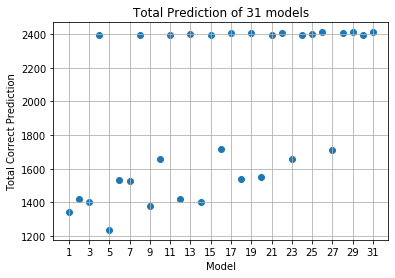

In [25]:
fig, ax = plt.subplots()
ax.scatter(range(1,len(x)+1), model31_pred['Total Correct Prediction'])
ax.xaxis.set_ticks(np.arange(1,32,2))
ax.set_title("Total Prediction of 31 models")
ax.set_ylabel("Total Correct Prediction")
ax.set_xlabel("Model")
ax.grid()

> As we can see there are many models that correctly predict >2000, which lead to no conclusion we can draw yet as the plot did not show any interesting trend result.

To filter the most probable prediction and prove Odor as the crucial explanatory variable to determine if the mushroom is edible or not. To prevent overfitting, we can use __Cross_Validation model__ with Random forest by loop it for 10 times to find the best by finding the most frequency appeared for the most correct prediction value.

- __Random Forest Model with Random_state 1__

In [26]:
from sklearn.model_selection import KFold

winner = []


#for n_state in range(1,4):  
for iterate in range(1,11):
    val = []
    for length in range(0,len(x)):
        X = binary_data[x[length]].values
        y = mushroom_data['Edible']   
           #kfold = KFold(2, shuffle = True, random_state = n_state)
        kfold = KFold(2, shuffle = True, random_state = 1)
        for train, test in kfold.split(X):
            X_train_cv = X[train]
            X_test_cv = X[test]
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 2, shuffle = True)
    
        for train, test in kfold.split(y):
            y_train_cv = y[train]
            y_test_cv = y[test]
    
            rand_forest = RandomForestClassifier(n_estimators=200)
            rand_forest.fit(X_train_cv, y_train_cv)
    
            y_pred_cv = rand_forest.predict(X_test_cv)
        
        cfm = confusion_matrix(y_test_cv, y_pred_cv)  
        corr_pred = sumOfDiagonal(cfm)   
        val.append(corr_pred)
        
    data = pd.DataFrame()
    data['Model'] = range(1, len(x)+1)
    data['pred'] = val
    model_val = data['Model'][data['pred'].idxmax()]
    max_data = data['pred'].max()
    winner.append(model_val)
    print(f"best prediction for loop {iterate} is {max_data} with model {model_val}")
    #acc = accuracy_score(y_test_cv, y_pred_cv)
    #print(f"The accuracy for random state {n_state} is {acc}")
    #print(f"{val}{nl}")
    

best prediction for loop 1 is 4030 with model 26
best prediction for loop 2 is 4030 with model 26
best prediction for loop 3 is 4030 with model 26
best prediction for loop 4 is 4030 with model 31
best prediction for loop 5 is 4030 with model 31
best prediction for loop 6 is 4029 with model 26
best prediction for loop 7 is 4030 with model 26
best prediction for loop 8 is 4030 with model 26
best prediction for loop 9 is 4030 with model 26
best prediction for loop 10 is 4030 with model 31


In [27]:
acc = accuracy_score(y_test_cv, y_pred_cv)
print(f"The accuracy for random state 1 is {acc}")

The accuracy for random state 1 is 0.9921221073362876


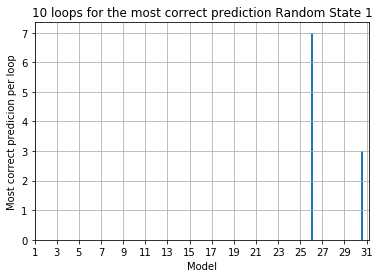

In [28]:
fig, ax = plt.subplots()
ax.hist(winner, width=0.2)
ax.xaxis.set_ticks(np.arange(1,32,2))
ax.set_title("10 loops for the most correct prediction Random State 1")
ax.set_ylabel("Most correct predicion per loop")
ax.set_xlabel("Model")
ax.grid()

The winner is Model 26 with winning 9 out of 10 loops which is __Model = CapShape + CapSurface + CapColor + Odor__

- __Random Forest Model with Random_state 2__

In [29]:
from sklearn.model_selection import KFold

winner = []


#for n_state in range(1,4):  
for iterate in range(1,11):
    val = []
    for length in range(0,len(x)):
        X = binary_data[x[length]].values
        y = mushroom_data['Edible']   
           #kfold = KFold(2, shuffle = True, random_state = n_state)
        kfold = KFold(2, shuffle = True, random_state = 2)
        for train, test in kfold.split(X):
            X_train_cv = X[train]
            X_test_cv = X[test]
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 2, shuffle = True)
    
        for train, test in kfold.split(y):
            y_train_cv = y[train]
            y_test_cv = y[test]
    
            rand_forest = RandomForestClassifier(n_estimators=200)
            rand_forest.fit(X_train_cv, y_train_cv)
    
            y_pred_cv = rand_forest.predict(X_test_cv)
        
        cfm = confusion_matrix(y_test_cv, y_pred_cv)  
        corr_pred = sumOfDiagonal(cfm)   
        val.append(corr_pred)
        
    data = pd.DataFrame()
    data['Model'] = range(1, len(x)+1)
    data['pred'] = val
    model_val = data['Model'][data['pred'].idxmax()]
    max_data = data['pred'].max()
    winner.append(model_val)
    print(f"best prediction for loop {iterate} is {max_data} with model {model_val}")
    #acc = accuracy_score(y_test_cv, y_pred_cv)
    #print(f"The accuracy for random state {n_state} is {acc}")
    #print(f"{val}{nl}")

best prediction for loop 1 is 4035 with model 19
best prediction for loop 2 is 4035 with model 19
best prediction for loop 3 is 4035 with model 19
best prediction for loop 4 is 4035 with model 19
best prediction for loop 5 is 4035 with model 19
best prediction for loop 6 is 4035 with model 19
best prediction for loop 7 is 4035 with model 19
best prediction for loop 8 is 4035 with model 19
best prediction for loop 9 is 4035 with model 19
best prediction for loop 10 is 4035 with model 19


In [30]:
acc = accuracy_score(y_test_cv, y_pred_cv)
print(f"The accuracy for random state 2 is {acc}")

The accuracy for random state 2 is 0.9918759231905465


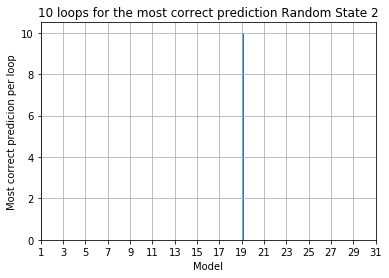

In [31]:
fig, ax = plt.subplots()
ax.hist(winner, width=0.2)
ax.xaxis.set_ticks(np.arange(1,32,2))
ax.set_title("10 loops for the most correct prediction Random State 2")
ax.set_ylabel("Most correct predicion per loop")
ax.set_xlabel("Model")
ax.grid()

The winner is Model 19 with winning 10 out of 10 loops which is __Model = CapShape  + CapColor + Odor__

In [32]:
model31_pred

,Name,Total Correct Prediction
Model,,
1,[CapShape],1344
2,[CapSurface],1420
3,[CapColor],1404
4,[Odor],2393
5,[Height],1236
6,"[CapShape, CapSurface]",1535
7,"[CapShape, CapColor]",1524
8,"[CapShape, Odor]",2395
9,"[CapShape, Height]",1379


In [36]:
#def highlight(s):
#    if s['Total Correct Prediction'] > 2408:
#        return ['background-color: yellow']*2
#    else:
#        return ['background-color: white']*2

model31_pred.style.apply(lambda x: ['background-color: yellow']*2 if x['Total Correct Prediction'] > 2408 
                         else ['background-color: white']*2, axis=1)

,Name,Total Correct Prediction
Model,,
1,['CapShape'],1344
2,['CapSurface'],1420
3,['CapColor'],1404
4,['Odor'],2393
5,['Height'],1236
6,"['CapShape', 'CapSurface']",1535
7,"['CapShape', 'CapColor']",1524
8,"['CapShape', 'Odor']",2395
9,"['CapShape', 'Height']",1379


- Finally, we can conclude through this project that Odor is an essential factor to determine whether the mushroom is edible or not. This is proved from results of Single Random Forest test and Cross Validation Random Forest test which told us Model 19 & 26 are the most optimized as both of them contain __'Odor'__. 


- Another finding is, Model 31st is not the best opton could due to Overfitting which our test choose model with lesser input nstead (Model 19 & 26). This shows that __'Height'__ is not reliable for this prediction.

- As this is only one model we test on, another classification model can be applied to this dataset further on. This could improve the work and find the best fit & accuracy.

> The Result can be compared to the report can be accessed here [**Coursework3.pdf**](https://github.com/nico2997/Jupyter_notebook_data_analyst/blob/main/Mushroom%20Edibility%20Analysis/Coursework%203.pdf) and the [**R-code**](https://github.com/nico2997/Jupyter_notebook_data_analyst/blob/main/Mushroom%20Edibility%20Analysis/Statistical%20Learning%203.R)